In [7]:
# Import basic librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

import warnings
warnings.filterwarnings("ignore")

# Reading in dataset

In [8]:
# reading in raw data directly from UCI ML repository 
df = pd.read_csv('processed.cleveland.data',sep = ',',header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Formatting columns

In [9]:
# adding in columns names
df.columns =['age', 'sex', 'cp', 'trestbps','chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Cleaning data

In [10]:
# looking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# finding rows with ? 
(df == '?').sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [12]:
# dropping rows with ? 
df = df[df.ca != '?']
df = df[df.thal != '?']

In [13]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


# Converting columns to appropriate data types

In [14]:
# viewing original datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  target    297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [15]:
# converting fields ca and thal from objects to floats 
df['thal'] = pd.to_numeric(df['thal'])
df['ca'] = pd.to_numeric(df['ca'])

In [16]:
# changing all columns except oldpeak to int data type 
cols=[i for i in df.columns if i not in ["oldpeak","target"]]
for col in cols:
    df[col]=df[col].astype(np.int64)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


In [18]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3


# Converting target variable to binary 

In [19]:
# label 0 = no CVD, labels 1-4 = CVD 

# printing count of class labels 
print(df.target.value_counts())

0    160
1     54
2     35
3     35
4     13
Name: target, dtype: int64


In [20]:
# changing rows in target field with number other than 0 to 1
df.loc[df['target'] != 0, 'target'] = 1

In [21]:
# print count of new class labels 
print(df.target.value_counts())

0    160
1    137
Name: target, dtype: int64


In [22]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


# Formatting catagorical variables labels to start with 0 

In [23]:
# cp starts with 1 ,so changing it to start with 0
print(df.cp.value_counts())

4    142
3     83
2     49
1     23
Name: cp, dtype: int64


In [24]:
# change from 1-4 to 0 -3
df.loc[df['cp'] == 1, 'cp'] = 0
df.loc[df['cp'] == 2, 'cp'] = 1
df.loc[df['cp'] == 3, 'cp'] = 2
df.loc[df['cp'] == 4, 'cp'] = 3

In [25]:
# viewing fixed labels
print(df.cp.value_counts())

3    142
2     83
1     49
0     23
Name: cp, dtype: int64


In [26]:
# changing slope field
print(df.slope.value_counts())

1    139
2    137
3     21
Name: slope, dtype: int64


In [27]:
df.loc[df['slope'] == 1, 'slope'] = 0
df.loc[df['slope'] == 2, 'slope'] = 1
df.loc[df['slope'] == 3, 'slope'] = 2

In [28]:
# viewing fixed labels
print(df.slope.value_counts())

0    139
1    137
2     21
Name: slope, dtype: int64


In [29]:
# changing thal 
print(df.thal.value_counts())

3    164
7    115
6     18
Name: thal, dtype: int64


In [30]:
df.loc[df['thal'] == 3, 'thal'] = 0
df.loc[df['thal'] == 6, 'thal'] = 1
df.loc[df['thal'] == 7, 'thal'] = 2

In [31]:
# viewing fixed labels
print(df.thal.value_counts())

0    164
2    115
1     18
Name: thal, dtype: int64


In [32]:
# # viewing cleaned and formatted dataframe
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,0,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,2,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,0,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,3,140,241,0,0,123,1,0.2,1,0,2,1
298,45,1,0,110,264,0,0,132,0,1.2,1,0,2,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,2,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,2,1


# Exploratory data analysis

### Univaritate analysis 

In [33]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [34]:
# count of classes in target variable
print(df.target.value_counts()) 

0    160
1    137
Name: target, dtype: int64


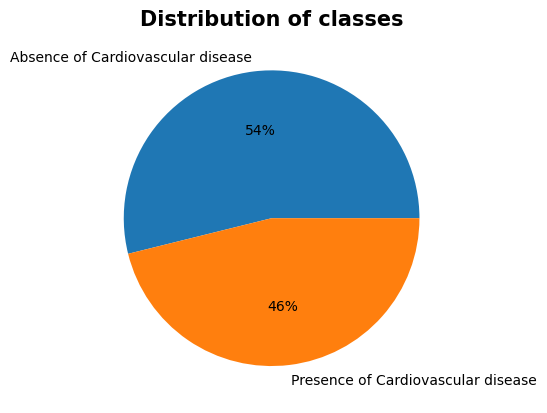

In [35]:
# pie chart showing distrbution of target classes 

plt.pie(df['target'].value_counts(),labels = ['Absence of Cardiovascular disease' , 'Presence of Cardiovascular disease'], autopct = '%.0f%%')
plt.title('Distribution of classes',fontdict={'fontweight': 'bold', 'fontsize': 15});

# Multivariate analysis

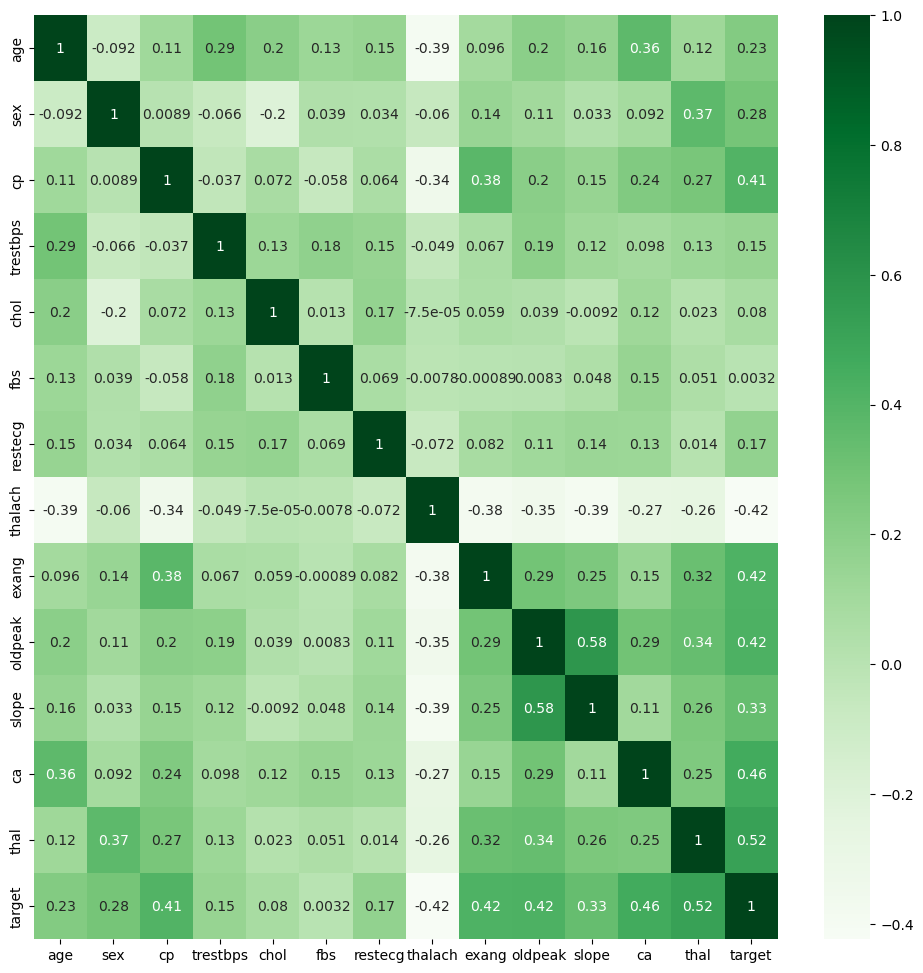

In [36]:
# correlartion matrix
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cbar = True, annot= True,cmap = 'Greens'); #this shows its exact same data

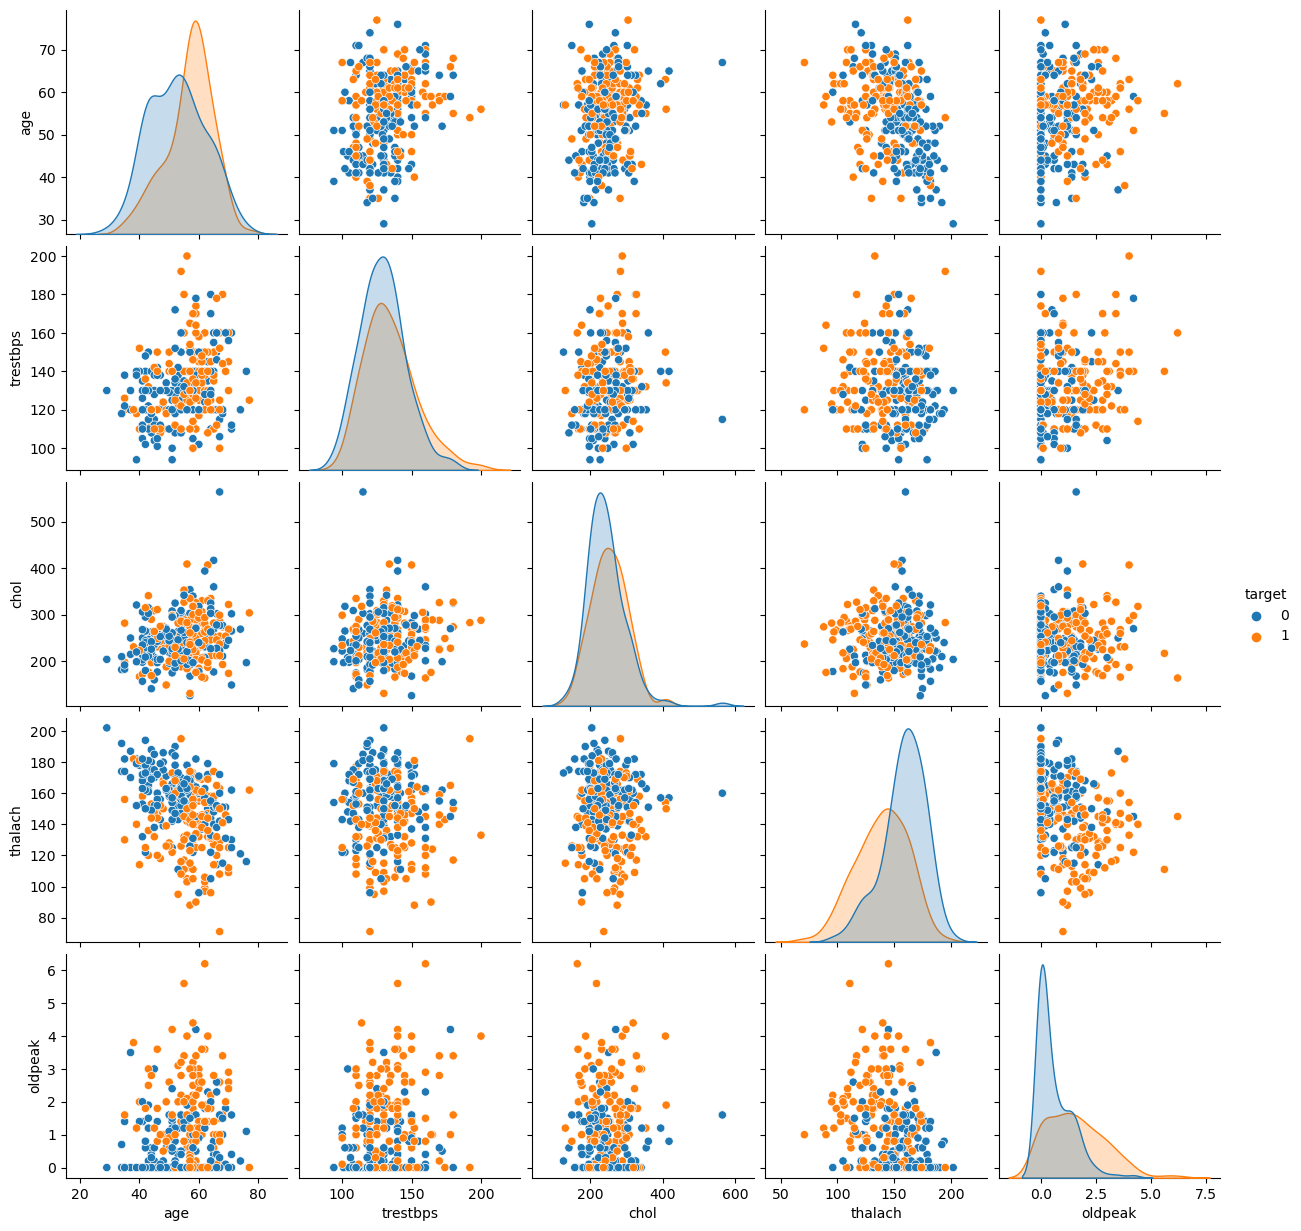

In [37]:
# pair plot with continuous variables
sns.pairplot(df[['age','trestbps','chol','thalach','oldpeak','target']],hue = 'target');

# Data Preprocessing

In [46]:
# ML librarys
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
!pip install xgboost
from xgboost import XGBClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score ,f1_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

     --------------------------------------- 89.1/89.1 MB 28.5 MB/s eta 0:00:00


# One Hot Encoding 

In [47]:
# one hot encoding discrete variables
df= pd.get_dummies(df,columns=['sex','fbs','exang','cp','restecg','slope','ca','thal'],drop_first = False)
df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,fbs_0,fbs_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,63,145,233,150,2.3,0,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
1,67,160,286,108,1.5,1,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
2,67,120,229,129,2.6,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,37,130,250,187,3.5,0,0,1,1,0,...,0,0,1,1,0,0,0,1,0,0
4,41,130,204,172,1.4,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,140,241,123,0.2,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
298,45,110,264,132,1.2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
299,68,144,193,141,3.4,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
300,57,130,131,115,1.2,1,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1


# Train test split

In [48]:
# set up Features matrix and target variable
X = df.drop('target', axis = 1)
y = df.target

X.shape,y.shape

((297, 28), (297,))

In [49]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2) # 80 /20 split

X_train.shape, X_test.shape 

((237, 28), (60, 28))

# Feature scaling

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns= X.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X.columns)

# Feature selection

In [51]:
# default random forest model
rf = RandomForestClassifier(random_state = 4)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=4)

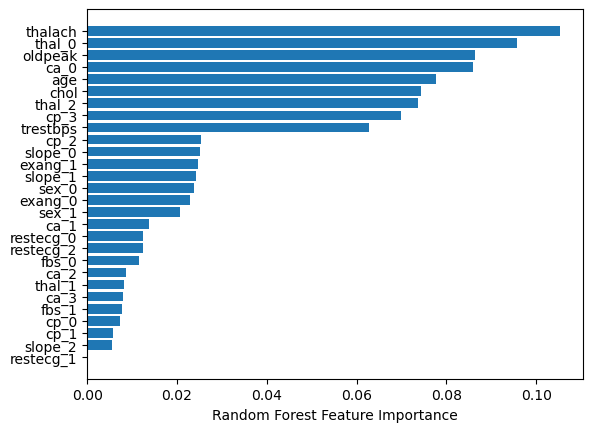

In [52]:
# ploting feature importance in order
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance");

In [53]:
# removing least important feature ,restecg_1

X_train = X_train.drop(['restecg_1'], axis=1)

X_test = X_test.drop(['restecg_1'], axis=1)

X_train.shape, X_test.shape

((237, 27), (60, 27))

## Cross validation 

In [54]:
# setting up cross validation technique
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10)

# K-nearest Neighbors Classifier

In [55]:
# set up hyperparamter grid 
k_range = list(range(1, 200))

params = dict(n_neighbors=k_range,)

In [56]:
# set up deafaulmodel 
knn = KNeighborsClassifier()

In [57]:
# set up random search object

random_knn = RandomizedSearchCV(knn, params, cv=cv, scoring='recall', n_iter = 200, n_jobs =-1,random_state = 4)

# Fit the random search model to training data
random_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(), n_iter=200, n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...]},
                   random_state=4, scoring='recall')

In [58]:
# print best value for k
print(random_knn.best_estimator_)

KNeighborsClassifier()


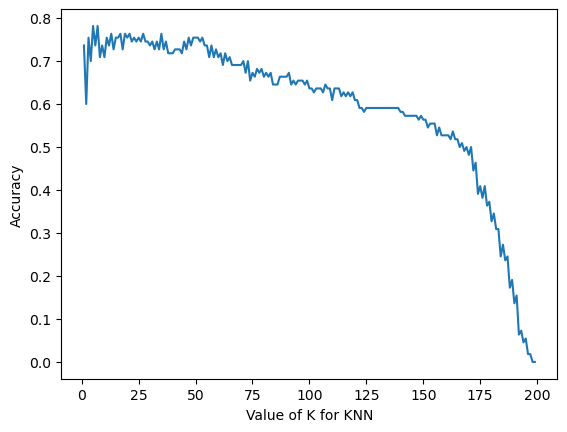

In [59]:
# visualising accuracy for different values for k 
random_mean_scores = random_knn.cv_results_['mean_test_score']

plt.plot(k_range, random_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy');

In [60]:
# set up knn model with best hyperparmaters
knn = KNeighborsClassifier()

# fit model to training data
knn.fit(X_train, y_train)

# y pred
y_pred = knn.predict(X_test)

In [61]:
# evaluate knn training and test scores
print('KNN Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
print('KNN Test accuracy: {:.4f}'.format(knn.score(X_test,y_test)))

KNN Training accuracy: 0.8650
KNN Test accuracy: 0.8167


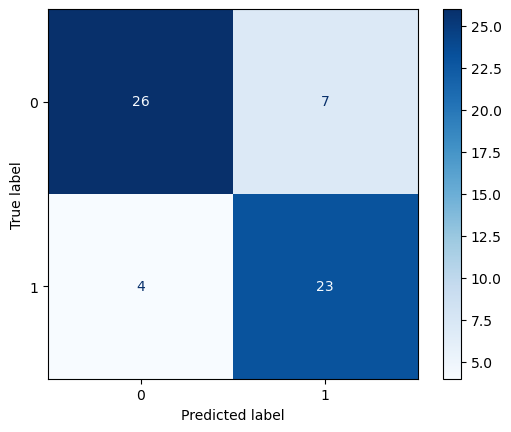

In [62]:
# confusion matrix for knn
plot_confusion_matrix(knn,X_test,y_test,cmap=plt.cm.Blues);
plt.show()

In [63]:
# printing final evaluation metrics for knn
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.817
Precision: 0.767
Recall: 0.852
F1: 0.807


# Logistic regression model

In [64]:
# set up hyperparamter grid for logistic regression 
params = {'penalty': ['None','l1','l2','elasticnet'],
          'solver' : ['lbfgs','liblinear','saga'],
          'C' : [0.1, 1, 10] }

In [65]:
# set up default logistic regression model 
logreg = LogisticRegression(random_state = 4)

In [66]:
# set up random search object  for logistic model
random_logreg = RandomizedSearchCV(logreg, params, cv=cv, scoring='recall', n_iter = 100, n_jobs =-1,random_state = 4)

# fit search object to training data 
random_logreg.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=LogisticRegression(random_state=4), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'penalty': ['None', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'saga']},
                   random_state=4, scoring='recall')

In [67]:
#  pint best hyperparmaters for logistic regression model
print(random_logreg.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


In [68]:
# printing optimal hyperparmater as list
paramater_values = list((random_logreg.best_params_).values())
paramater_values

['liblinear', 'l1', 0.1]

In [69]:
# constructing best logistic regression model
logreg = LogisticRegression(solver = paramater_values[0],
                           penalty = paramater_values[1],
                           C =  paramater_values[2],
                           random_state = 4)

# fit to training data
logreg.fit(X_train, y_train)

# y pred
y_pred = logreg.predict(X_test)

In [70]:
# logistic regression training and testing accuracy
print('log reg Training accuracy: {:.4f}'.format(logreg.score(X_train,y_train)))
print('log reg Test accuracy: {:.4f}'.format(logreg.score(X_test,y_test)))

log reg Training accuracy: 0.8608
log reg Test accuracy: 0.8333


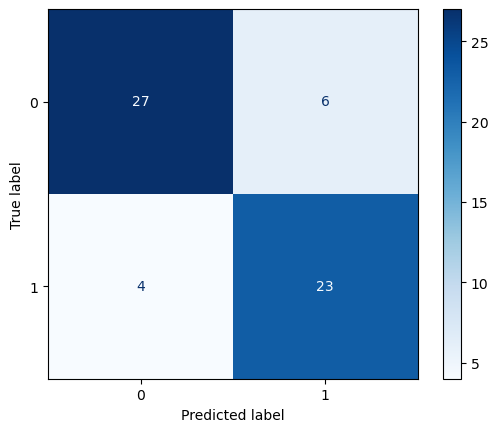

In [71]:
# confusion matrix for best logistic regrssion model
plot_confusion_matrix(logreg,X_test,y_test,cmap=plt.cm.Blues);
plt.show()

In [72]:
# printing final evaluation metrics for best logistic regression model
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.833
Precision: 0.793
Recall: 0.852
F1: 0.821


# Random Forest Classifier

In [73]:
# params for random forest 
params = {'n_estimators': [400, 600, 800, 1000],
            'max_depth':[3, 6, 9, 12, 15],
            'max_features': ['sqrt','log2'],
            'criterion': ['gini', 'entropy']}

In [74]:
# set up default random forest model
rf = RandomForestClassifier(random_state = 4)

In [75]:
# random search object
random_rf = RandomizedSearchCV(rf, params, cv=cv, scoring='recall', n_iter = 100, n_jobs =-1,random_state = 4)

random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=4), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 6, 9, 12, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [400, 600, 800, 1000]},
                   random_state=4, scoring='recall')

In [76]:
# best parmaters for random forest model
print(random_rf.best_params_)

{'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 3, 'criterion': 'entropy'}


In [77]:
# getting best parmaters as a list
paramater_values = list((random_rf.best_params_).values())
paramater_values

[400, 'sqrt', 3, 'entropy']

In [78]:
# constructing best random forest model
rf = RandomForestClassifier(n_estimators = paramater_values[0],
                            max_features = paramater_values[1],
                            max_depth = paramater_values[2],
                            criterion = paramater_values[3],
                            random_state = 4)

# fit to training data
rf.fit(X_train, y_train)

# y pred
y_pred = rf.predict(X_test)


In [79]:
print('Random forest Training accuracy: {:.4f}'.format(rf.score(X_train,y_train)))
print('Random forest Test accuracy: {:.4f}'.format(rf.score(X_test,y_test)))

Random forest Training accuracy: 0.8819
Random forest Test accuracy: 0.8167


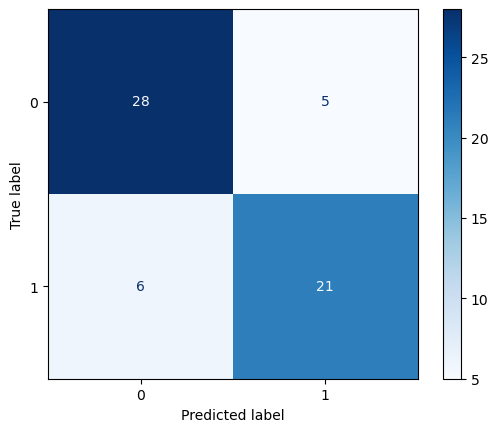

In [80]:
# confusion matrix for random forest
plot_confusion_matrix(rf,X_test,y_test,cmap=plt.cm.Blues);
plt.show()

In [81]:
# evaluation scores
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.817
Precision: 0.808
Recall: 0.778
F1: 0.792


# AdaBoost Classifier

In [82]:
# hyperparameter grid for adaboost classifier
params = {'n_estimators':[100,200,500,750,1000],
          'learning_rate':[0.001, 0.01, 0.1]}

In [83]:
# set up defualt adaboost model
ada = AdaBoostClassifier(random_state = 4)

In [84]:
# set up random search object for adaboost classifier
random_ada = RandomizedSearchCV(ada, params, cv=cv, scoring='recall', n_iter = 100, n_jobs =-1,random_state = 4)

random_ada.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=AdaBoostClassifier(random_state=4), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'n_estimators': [100, 200, 500, 750,
                                                         1000]},
                   random_state=4, scoring='recall')

In [85]:
# printing best hyperparamters for adboost model
print(random_ada.best_params_)

{'n_estimators': 200, 'learning_rate': 0.01}


In [86]:
# getting best hyperparmaters as a list
paramater_values = list((random_ada.best_params_).values())
paramater_values

[200, 0.01]

In [87]:
# constructing best Adaboost classifier model
ada = AdaBoostClassifier(n_estimators = paramater_values[0], 
                        learning_rate = paramater_values[1],
                        random_state = 4)

# fit best adaboost model to training data 

ada.fit(X_train, y_train)

# y pred
y_pred = ada.predict(X_test)

In [88]:
# train and test score for AdaBoost model 
print('AdaBoost Training accuracy: {:.4f}'.format(ada.score(X_train,y_train)))
print('AdaBoost Test accuracy: {:.4f}'.format(ada.score(X_test,y_test)))

AdaBoost Training accuracy: 0.8565
AdaBoost Test accuracy: 0.8333


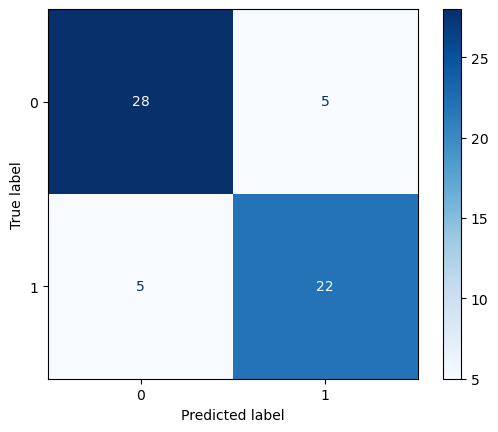

In [89]:
# confusion matrix for AdaBoost model
plot_confusion_matrix(ada ,X_test,y_test,cmap='Blues');
plt.show()

In [90]:
# evaluation scores
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.833
Precision: 0.815
Recall: 0.815
F1: 0.815


# XGBoost Classifier

In [91]:
# hyperparmater grid for XGBOOST classifier
params = {'colsample_bytree': [0.3, 0.5, 1.0],
          'gamma' : [0.1, 1, 1.5],
          'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
          'min_child_weight' : [1, 5, 10],
          'subsample' : [ 0.8,1.0],
          'n_estimators' : [100, 300, 600, 800, 1000],
          'max_depth' : [5,10,15,20] }

In [92]:
# default XGB model
xgb = XGBClassifier(random_state = 4)

In [93]:
# set up random search object for xgboost classifier
random_xgb = RandomizedSearchCV(xgb, params, cv=cv, scoring='recall', n_iter = 100, n_jobs =-1,random_state = 7)

# fit random search to training data
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           impo...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                        

In [94]:
# print best hyperparamaters
print(random_xgb.best_params_)

{'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 10, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 1.5, 'colsample_bytree': 0.3}


In [95]:
# getting best hyperparmeters as a list
paramater_values = list((random_xgb.best_params_).values())
paramater_values

[0.8, 300, 10, 15, 0.1, 1.5, 0.3]

In [96]:
# constructing best XGBoost classifier model
xgb = XGBClassifier(subsample = paramater_values[0],
                    n_estimators = paramater_values[1],
                    min_child_weight = paramater_values[2],
                    max_depth = paramater_values[3],
                    learning_rate = paramater_values[4],
                    gamma = paramater_values[5],
                    colsample_bytree = paramater_values[6],
                    random_state = 4)

# fit to trainng data 
xgb.fit(X_train, y_train)

# y pred
y_pred = xgb.predict(X_test)

In [97]:
# train and test Accuracy for XGB model
print('XGB Training accuracy: {:.4f}'.format(xgb.score(X_train,y_train)))
print('XGB Test accuracy: {:.4f}'.format(xgb.score(X_test,y_test)))

XGB Training accuracy: 0.8650
XGB Test accuracy: 0.8500


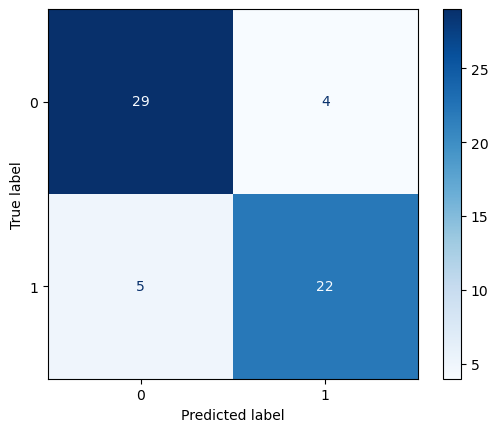

In [98]:
# confusion matrix
plot_confusion_matrix(xgb ,X_test,y_test,cmap=plt.cm.Blues);
plt.show()

In [99]:
# evaluation metrics
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.850
Precision: 0.846
Recall: 0.815
F1: 0.830


# <u>Summarising Evaluation Metrics</u>

In [100]:
# function to compare evalaution scores
def final_score_comparison(models, X_test, y_test, X_train, y_train):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(X_test)
        train = round(model.score(X_train, y_train), 3)*100
        test = round(accuracy_score(y_test, predictions), 3)*100
        precsion = round(precision_score(y_test, predictions), 3)*100
        recall = round(recall_score(y_test, predictions), 3)*100
        f1 = round(f1_score(y_test, predictions), 3)*100
        scores[str(model)] = [train, test, precsion, recall, f1]
    scores.index = ['Train Accuracy','Test Accuracy', 'Precsion', 'Recall', 'F1 score']
    return scores

In [101]:
# calling function on tuned models to print evaluation scores in Table
final_scores = final_score_comparison([knn, logreg, rf, ada, xgb ], X_test, y_test, X_train, y_train)
final_scores.columns = ['KNeighbors Classifier','Logistic Regression','Random Forest Classifier','AdaBoost Classifier ' ,'XGBoost Classifier']
final_scores = final_scores.transpose()

final_scores

,Train Accuracy,Test Accuracy,Precsion,Recall,F1 score
KNeighbors Classifier,86.5,81.7,76.7,85.2,80.7
Logistic Regression,86.1,83.3,79.3,85.2,82.1
Random Forest Classifier,88.2,81.7,80.8,77.8,79.2
AdaBoost Classifier,85.7,83.3,81.5,81.5,81.5
XGBoost Classifier,86.5,85.0,84.6,81.5,83.0


# AUC-ROC scores

In [102]:
# function to compare ROC  curves
def AUC_score_comparison(models, test_features, test_labels, train_features, train_labels):
    scores = pd.DataFrame()
    for model in models:
        y_score = model.predict_proba(test_features)
        AUC = round(roc_auc_score(test_labels, y_score[:, 1]), 3)
        scores[str(model)] = [AUC]
    scores.index = ['AUC-ROC Score']
    return scores

AUC_scores = AUC_score_comparison([ knn, logreg, rf, ada, xgb], X_test,y_test,X_train,y_train)
AUC_scores.columns = ['KNeighbors Classifier','Logistic Regression','Random Forest Classifier','AdaBoost Classifier ','XGBoost Classifier']
AUC_scores = AUC_scores.transpose()

AUC_scores

,AUC-ROC Score
KNeighbors Classifier,0.915
Logistic Regression,0.898
Random Forest Classifier,0.897
AdaBoost Classifier,0.872
XGBoost Classifier,0.919


In [103]:
# joining both tables into one table
final_result_table=final_scores.join(AUC_scores)
final_result_table

,Train Accuracy,Test Accuracy,Precsion,Recall,F1 score,AUC-ROC Score
KNeighbors Classifier,86.5,81.7,76.7,85.2,80.7,0.915
Logistic Regression,86.1,83.3,79.3,85.2,82.1,0.898
Random Forest Classifier,88.2,81.7,80.8,77.8,79.2,0.897
AdaBoost Classifier,85.7,83.3,81.5,81.5,81.5,0.872
XGBoost Classifier,86.5,85.0,84.6,81.5,83.0,0.919


# Performance metric visualisations 

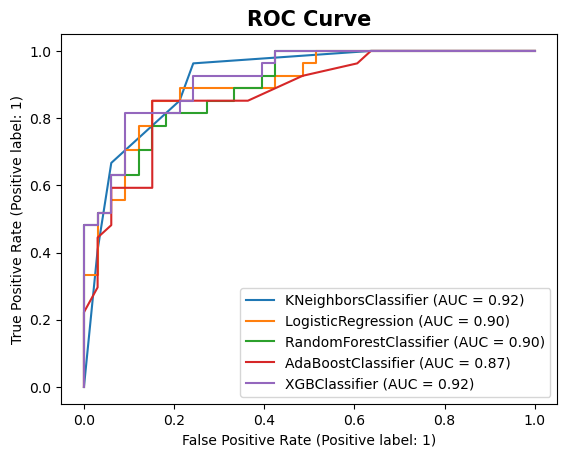

In [104]:
# comparing ROC curves of all models
disp2 = plot_roc_curve(knn,X_test,y_test)
plot_roc_curve(logreg,X_test,y_test,ax=disp2.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp2.ax_)
plot_roc_curve(ada,X_test,y_test,ax=disp2.ax_)
plot_roc_curve(xgb,X_test,y_test,ax=disp2.ax_)

plt.title('ROC Curve',fontweight='bold', fontsize=15);

# Confusion matrix visualisation 

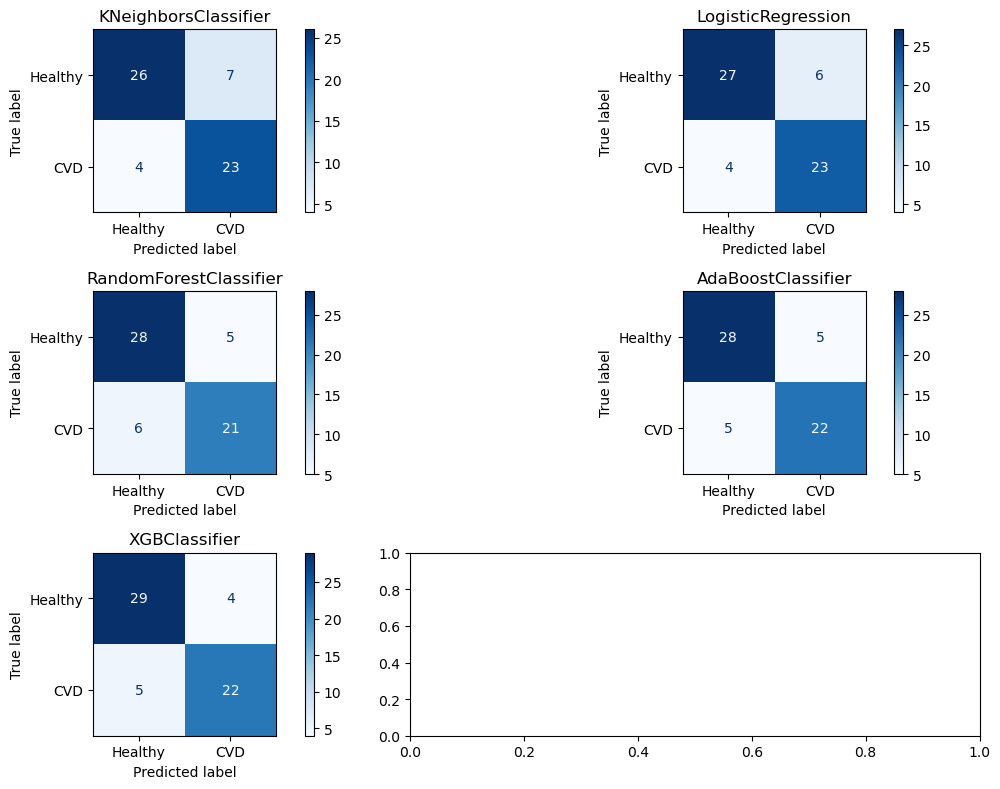

In [105]:
# plotting confusion matrixes

Models = [knn, logreg, rf, ada, xgb]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,8))

for models, ax in zip(Models, axes.flatten()):
    plot_confusion_matrix(models, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=["Healthy", "CVD"])
    ax.title.set_text(type(models).__name__)

plt.tight_layout()  
plt.show()